# Week 5 Notes

## 5.1.1 Introduction to Statistical Learning

Statistical learning is the process of using data to learn about the underlying distribution of a target variable.
- supervised learning: the process of learning from data that has a known target variable
- unsupervised learning: the process of learning from data that has no target variable

Supervised learning matches inputs and outputs, whereas unsupervised learning discovers structure for inputs only.

We will learn about the basics of supervised learning in this case study. We will cover both regression (quantitative outcome) and classification problems (qualitative outcome).

Loss functions are used to quantify the quality of a model. In regression, the most common loss function is the Mean Squared Error (MSE). In classification, the most common loss function is 0-1 Loss.

Say we have a dataset and want to predict the relationship between a predictor variable $X$ and a target variable $Y$. The basics of regression involves finding an average point around a small subset of points in the dataset, and then predicting the value of $Y$ for a new point $X$.

Now say our data set has an output of just 0 and 1 (we have a classification problem now). We now want to estimate the outcome of the target variable $Y$ based on the predictor variable $X$ by finding the outcome of $Y$ with the highest probability for the given value of $X$.

## 5.1.2 Generating Example Regression Data

In [1]:
import numpy as np, scipy.stats as stats, matplotlib.pyplot as plt

# Data parameters
number_of_samples = 100
beta_0 = 5
beta_1 = 2

np.random.seed(1)  # set seed for reproducibility

x = 10 * stats.uniform.rvs(size=number_of_samples)  # generate uniform random numbers between 0 and 10
y = beta_0 + beta_1 * x + stats.norm.rvs(loc=0, scale=1, size=number_of_samples)  # generate normal random numbers with mean 0 and standard deviation 1

Text(0, 0.5, 'y')

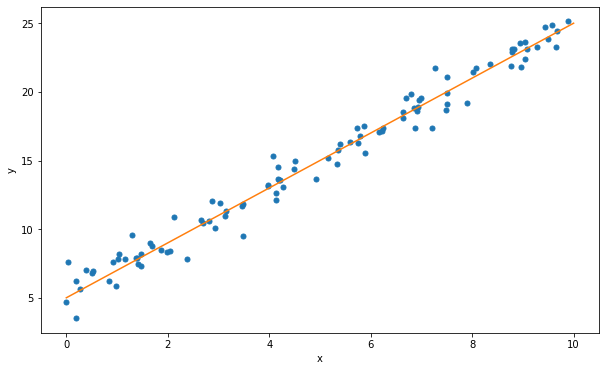

In [2]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel('x')
plt.ylabel('y')

In [3]:
print(np.mean(x), np.mean(y))  # Comprehension Check Question

4.8587792760014565 14.80142786070299


## 5.1.3 Simple Linear Regression

A simple linear regression model involves assuming the relationship between the predictor variable $X$ and the target variable $Y$ is linear; i.e. $$Y = \beta_0 + \beta_1 X + \epsilon.$$

We can use training data to estimate the parameters $\beta_0$ and $\beta_1$, and then we can predict future values of $Y$ based on  new data.

In [1]:
# Comprehension Check Question
import numpy as np
import scipy.stats as ss

n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

rss

81.540007425512

## 5.1.4 Least Square Regression in Code

Our method of regression will involve matrix calculus. We will assume we know the true value of $\beta_0$ and we are trying to find the value of $\beta_1$ that minimizes the RSS.

In [2]:
rss = []  # initialize list to store rss values
slopes = np.arange(-10, 15, 0.01)  # generate a range of slopes

In [3]:
for slope in slopes:  # compute the rss value of each slope and store it in the rss llist
    rss.append( np.sum((y - beta_0 - slope * x) ** 2) )

In [5]:
rss[0:10]  # check the first 10 values of the rss list

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741]

In [6]:
index_of_min_rss = np.argmin(rss)  # find the index of the minimum rss value
index_of_min_rss

1200

In [7]:
slopes[index_of_min_rss]  # find the slope that minimizes the rss

1.9999999999997442

Let us plot a generated slopes vs. corresponding RSS values graph.

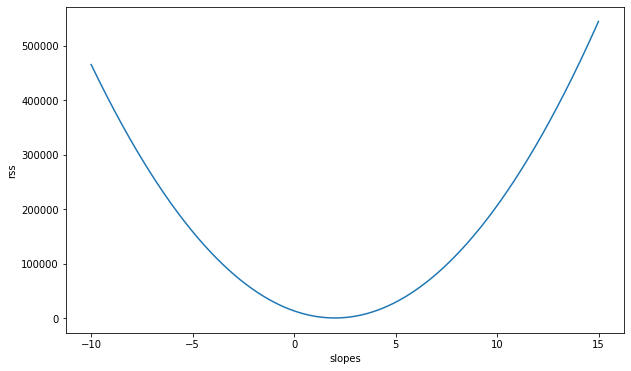

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(slopes, rss)
plt.xlabel('slopes')
plt.ylabel('rss')
plt.show()

In [9]:
## 5.1.5 Simple Linear Regression in Code

In [12]:
import statsmodels.api as sm
model = sm.OLS(y, x)
estimate = model.fit()
print(estimate.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sun, 15 May 2022   Prob (F-statistic):                    1.14e-75
Time:                        19:02:58   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model generated is actually a linear model with no intercept term; that's why we have an artificially large slope value when we know the true slope to be $2$ from our specified randomly generated data.

In [13]:
model = sm.OLS(y, sm.add_constant(x))
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sun, 15 May 2022   Prob (F-statistic):           7.47e-82
Time:                        19:05:40   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0